In [36]:
# Importing packages
import os
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# Importing data with network creation prepared by Chia
nodes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MLNS/project/Copie de youtube_raw.csv")

In [27]:
pd.set_option("display.max_columns", None)

In [31]:
# for some reason, the datafrane had the id twice, we'll drop it, as we'll drop the last columns with the video recomended 
nodes.drop("id.1", inplace = True, axis = 1 )
nodes.drop(nodes.iloc[:, 9:], inplace=True, axis=1)
nodes.head()

id      uploader    age          category  length     views  rate  \
0  2rwktobtv9s            EA  742.0   Gadgets & Games    83.0  389536.0  2.65   
1  h6Ghupxbj9g       KB42PAH  742.0            Sports    28.0  276207.0  4.57   
2  mfeZibn3vmU      Gromek66  742.0            Comedy   278.0  151693.0  4.68   
3  86Fe6LICKKk  lonelygirl15  742.0    People & Blogs   148.0  125061.0  2.77   
4  XbRkmBcVWlc        Htiwan  742.0  Film & Animation    79.0  108868.0  4.33   

   ratings  comments  
0   2294.0     268.0  
1    297.0     424.0  
2    228.0      96.0  
3   1343.0    1419.0  
4    282.0     245.0

## Basic properties of the network

In [10]:
# This function will be used for exploring data
def check_df(dataframe, head=5):
    print("####################################### Df info ########################################")
    print(dataframe.info())
    print(dataframe.describe())
    print("######################################### Shape ########################################")
    print(dataframe.shape)
    #print("######################################### Head #########################################")
    #print(dataframe.head(head))  
    #print("######################################### Tail #########################################")
    #print(dataframe.tail(head))
    print("######################################### NA ###########################################")
    print(dataframe.isnull().sum())
    print("############################## Length of unique id #####################################")
    print(len(dataframe.id.unique()))
    print("################################# Length of data #######################################")
    print(len(data))
    print("################################### duplicates ########################################")
    print(dataframe.duplicated().sum())
    


check_df(nodes)

# for some videos we do not have all the recommendations 

####################################### Df info ########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154817 entries, 0 to 154816
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        154817 non-null  object 
 1   uploader  154817 non-null  object 
 2   age       154817 non-null  float64
 3   category  154817 non-null  object 
 4   length    154817 non-null  float64
 5   views     154817 non-null  float64
 6   rate      154817 non-null  float64
 7   ratings   154817 non-null  float64
 8   rec_20    144540 non-null  object 
dtypes: float64(5), object(4)
memory usage: 10.6+ MB
None
                 age        length         views           rate        ratings
count  154817.000000  1.548170e+05  1.548170e+05  154817.000000  154817.000000
mean      607.289671  2.175740e+02  7.741846e+03       3.489661      20.929549
std       120.578319  2.817809e+03  7.493429e+04       1.884820   

# Importing edges

In [13]:
df_edges = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLNS/project/Copie de edges.csv', sep='\t')
df_edges.head(2)

from           to
0  2rwktobtv9s  IqlxYO7YCI8
1  2rwktobtv9s  FkKWCBWVwQg

Nodes

In [32]:
nodes.head(2)

id uploader    age         category  length     views  rate  \
0  2rwktobtv9s       EA  742.0  Gadgets & Games    83.0  389536.0  2.65   
1  h6Ghupxbj9g  KB42PAH  742.0           Sports    28.0  276207.0  4.57   

   ratings  comments  
0   2294.0     268.0  
1    297.0     424.0

# Create network

In [33]:
# here we import edges from pandas, otherwise if it was an edgelist file we would have used nx.read_edgelist
G = nx.from_pandas_edgelist(df_edges, 'from', 'to')

#retrieve largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True) # we sort the connected components
G0 = G.subgraph(Gcc[0]) # we just take the first one (the biggest)

print(G0)

Graph with 154677 nodes and 853539 edges


In [34]:
print(Gcc)

[{'3mSJMpU6rKk', 'dd13kDQttsc', 'SlyeKWO-Az8', 'p5d9dnP0lr8', 'aEEkJX2_Iro', 'x57A_isGNkA', 'r6gf6c14q8A', 'VkmeNLdhWk0', 'QaWdPQIU8q8', 'KLQOMix4qy8', 'nez0pPJQiw8', 'UTKRO_L18JY', '1aIf8qE3i_c', 'j6nJzr3sEM4', 'O2Y3_4Yl-po', 'fGIs1RD_3vQ', 'e77xJMevEkY', 'xJ7CJ7kJupQ', 'vOmZKhTxwJc', 'G2RJVKEr2CU', '5MLNoc-BxTg', 'oLLoOB1WJsc', '8xcg5HBQqYU', 'joWzph-JV18', 'oRztnxGeoFY', 'pM-akbe6cI8', 'g-YULGR6LmQ', '-_XHxfdep4Q', 'QX5UR2leYHA', 'WBBbT_0obUw', 'hkEkIOXsAiE', 'MTpC59oPQCo', 'ugZogti6GV0', '2wkcPvY-SS4', '7tbTPhxZXck', 'ad8e9ljktBM', 'Z-EjL0FC7Lo', 'TWdimuwWD30', '74zaxEpw2jQ', 'r1urlF_CEV0', 'Apk9UB05D2U', 'U4tlm6aFSJU', '5yakBKR6vDk', '6wLmQYUVsOI', '2O06FtDVkQE', 'q9bw4IMrmEk', 'aiivLGygSLE', '-nPQF5xFSTQ', 'Su6wQ4Jo_f4', 'LlXCTTJ9AdI', 'je1ubZneHg0', 'g0hyKy6SVOI', 'H7R1LJIVviI', 'Clw4bIGV-BY', '0cHV1s5LVU8', '_D0_ZHybc58', 'fPRZrLAc0L4', 'i0yo3Sd2JqQ', 'zkbfj8B0fdE', '0NYEdWzVKJs', 'hKuLiZRzMVY', 'PFSVGitjSRo', '4AzQeBTkntQ', 'rGgTMM0cITc', 'HE_RWBUZOB4', 'NmABJ0heTac', '4Jg5N_A

In [35]:
# to confirm
print("Largest connected component: {} nodes, {} edges".format(
        G0.number_of_nodes(), G0.number_of_edges()))


Largest connected component: 154677 nodes, 853539 edges


In [38]:
def graph_char(graph):

    print("################ all shortest paths ################")
    depths_graph = nx.shortest_path_length(G0, source='nn-kFlXplhk', weight=None) # picking one
    print(depths_graph)
    print("################# depth of the graph ################")
    depths = max(depths_graph.values())
    print(depths)
    #print("########## diameter ##########")
    #print(nx.algorithms.distance_measures.diameter(G0)) - takes too long
    print("################ max clique size ################")
    clique = nx.algorithms.clique.graph_clique_number(G0)
    print(clique)
 
graph_char(G0)


#### DAL LAB: 

# 1.2) Compute various characteristics of the network
def compute_network_characteristics(graph):
    prop = {}
    prop['N'] = graph.number_of_nodes() # number of nodes
    prop['M'] = graph.number_of_edges() # number of edges
    # degrees = list(dict(G.degree()).values())
    degrees = [degree for node, degree in graph.degree()] # degree list
    prop['min_degree'] = np.min(degrees) # minimum degree
    prop['max_degree'] = np.max(degrees) # maximum degree
    prop['mean_degree'] = np.mean(degrees) # mean of node degrees
    prop['median_degree'] = np.median(degrees) # median of node degrees
    prop['density'] = nx.density(graph) # density of the graph
    return prop

###################################################################
prop = compute_network_characteristics(graph=G)
print("Number of nodes: {}".format(prop['N']))
print("Number of edges: {}".format(prop['M']))
print("Min. degree: {}".format(prop['min_degree']))
print("Max. degree: {}".format(prop['max_degree']))
print("Mean degree: {}".format(prop['mean_degree']))
print("Median degree: {}".format(prop['median_degree']))
print("Density: {}".format(prop['density']))

################ all shortest paths ################
{'nn-kFlXplhk': 0, '5crgZjL6OA4': 1, 'IiDzp7YjiZU': 1, 'fTj_zTVAdjs': 1, 'j37ClrwbCcI': 1, 'I1D2LyqK8dc': 1, 'VWTXM3e02Sw': 1, 'PB6DlB2rlXE': 1, '3RoqOS0hk2k': 1, 'C-OCPbJiA64': 1, 'eYEABGodQqo': 1, 'CWNSNoHzdjk': 1, '2SECsMdYFqE': 1, '_rZUpVOo7g8': 1, 'IiUqBCntEGw': 1, 'HPrc-_v5x24': 1, 'Tx-l5eXQnqs': 1, 'pp8ADrfMsho': 1, 'xhJaPpEZAY0': 1, 'rbB78Zlrp0k': 1, 'QWM6-qtUzM8': 1, 'JxUg-3Hy7m0': 1, '3tSV8AxULtY': 1, 'c2OTLxeap_4': 2, 'nzY5dXVImNQ': 2, 'JsE9-SykW-U': 2, 'LZ9w3WtXbp8': 2, 'PK4y57k8rAs': 2, 'zyTrSen3ExQ': 2, '78nJZcuspow': 2, 'eRcWuFIob84': 2, 'dBCwcX-Hf9I': 2, 'IKUVCjr2IeI': 2, '1cZo2Rc6S-U': 2, 'T20dF1rahfM': 2, '4xE2DKZ1UpE': 2, 'iOSHozKu4xY': 2, 'cAPb_FxzHiE': 2, '4793ppWAyiE': 2, '197dhHY2MgU': 2, 'SzIO_KBOAY0': 2, 'P24MEFbtrOQ': 2, '7X8gP8vO1uM': 2, 'X0O0RoT81-Q': 2, 'TnNtibEPMxk': 2, 'NBFGl3iRfZA': 2, 'h2jJN7o-qFc': 2, 'ZEqmyKYt2rU': 2, 'eNOkzw_HDrE': 2, 'NiECdK3nt9I': 2, '0UOiY71J-Xk': 2, '3yw1wKNgFe8': 2, 'oWInEYOx-

* To compute the depth, we calculate the shortest paths from the root to every other node and find the maximum shortest path distance. 
* The diameter of a graph is the largest number of vertices which must be traversed in order to travel from one vertex to another when paths which backtrack, detour, or loop are excluded from consideration. 

# Let's now consider the nodes alone computing some centrality measures

We'll start with centrality. 

Degree centrality is defined as the number of links incident upon a node (i.e. the number of ties that a node has). If the network is directed (meaning that ties have direction), then two separate measures of degree centrality are defined, namely, indegree and outdegree. Indegree is a count of the number of ties directed to the node (head endpoints) and outdegree is the number of ties that the node directs to others (tail endpoints)

* the higher the degree the more central the node is

In [ ]:
# centrality 
# degree and eigenvalue centrality
degree_cent = nx.degree_centrality(G0)
eigen_cent = nx.eigenvector_centrality(G0)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_deg_dist(G):
    all_degrees = [ v for _, v in nx.degree(G) ]
    unique_degrees = sorted(set(all_degrees))
    count_of_degrees = []

    for i in unique_degrees:
        x = all_degrees.count(i)
        count_of_degrees.append(x)

    plt.plot(unique_degrees, count_of_degrees)
    plt.show()

plot_deg_dist(G)

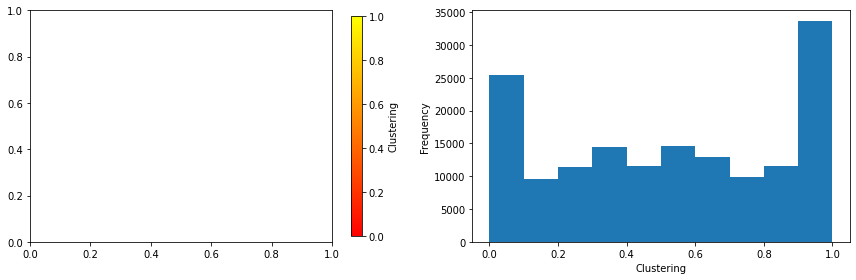

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

gc = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(gc)

#This is to draw the network- Please do not uncomment as it takes time becasue the graph is huge
cmap = plt.get_cmap('autumn') 
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
#nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1) #The line that we would uncomment in a perfect world
#fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)


#This is to plot the histogram 
ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#SORRY FOR THE EMPTY GRAPH- WILL REMOVE LATER BUT IT TOOK TIME TO RUN SO I DO NOT WANT TO RERUN- JUST LOOK AT THE RIGHT ONE

In [42]:
### NB - takes a lot of time to run!

# 1.1) Degree Centrality
'''
Degree centrality is one of the easiest to calculate. 
The degree centrality of a node is simply its degree—the number of edges it has. 
The higher the degree, the more central the node is
'''

def compute_degree_centrality(graph):
    '''
    :param graph:
    :return:
        degree_centrality:
        Dictionary of nodes with degree centrality as the value
    '''
    degree_centrality = {}

    for node in graph.nodes():
        degree_centrality[node] = graph.degree(node)
    
    return degree_centrality

print(compute_degree_centrality(G0))

'''
he closeness centrality of a node measures
 its average farness (inverse distance) to all other nodes.
'''

{'2rwktobtv9s': 48, 'IqlxYO7YCI8': 48, 'FkKWCBWVwQg': 48, 'FyuYJsBavBs': 48, 'VnLVtz4Vq18': 48, 'krT9Pjy9d8s': 48, 'U0raaoN6I6M': 48, 'PmRHEQaCFsw': 48, 'OW_Azt-ZFvI': 48, '2aDGS2ObyS8': 48, 'VdHsMJRszck': 48, 'vURuMxGC53A': 50, 'xXfmxQO2xz0': 48, 'N4DdAIc_0tY': 48, '1umiJrKfpdk': 48, 'AYNFCy6hvFQ': 48, 'SQI9xPF9rdk': 48, 'uG1Q5LhqpsM': 48, '1gxK1e5MSYg': 48, '4q5jSGOcZb8': 48, 'h6Ghupxbj9g': 34, '15VIqMXdKHU': 41, 'F8NQ7NELo40': 22, 'Hcb9w4KmQU4': 6, '8nTFFRtGb4M': 21, '-QrG5aspGv4': 27, 'BAhVfmm1--k': 30, 'KZ1dgZhOObc': 16, 'O1dXfikoYoQ': 24, 'RDrA0bWPlhU': 34, '-vFRkOd3GjY': 21, 'hP4mS2nnfus': 31, 'UZcvur6dBqM': 29, 'bFhohWt2rAA': 2, 'Ho-DLeAdZj4': 28, 'qbR7WRXIO-E': 35, '_-lcaXabZ8I': 26, 'D3PZXxx57-4': 26, 'rt-ytACeVM0': 27, '1lYXY_eTNY8': 23, 'SPSHB1B65-4': 30, 'mfeZibn3vmU': 28, 'MwyI6Fm6Odo': 20, 'mM8m8FAu5ps': 177, 'SjXhtLnG_Ns': 19, 'Q7H7so-UXqw': 27, '86F8p2xmy7E': 38, 'WaijogJsTh8': 28, 'q7h8VZXaYew': 11, 'zTNcikpHf5Y': 27, 'cCqjkco999U': 28, 'XVRuFjZ8sTo': 27, 'MydHXSjZgp4

In [45]:
## 1.2) Closeness and Harmonic Centrality took way too long 

# Analysis of the robustness

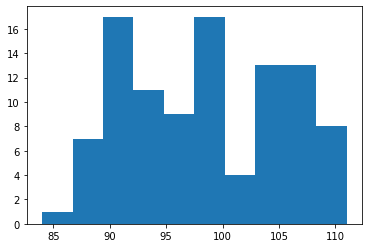

In [51]:
import matplotlib.pyplot as plt

def plot_degree_dist(G0):
  degrees = [G0.degree(n) for n in G0.nodes()]
  plt.hist(degrees)
  plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

Roughly, 
* 20% of nodes have a degree between 98 and 100
* Around 113% between 104 and 107


## Degree distribution

In [52]:
#Average degree in the graph 
# create_using= nx.DiGraph(), nodetype=int
N, K = G.order(), G.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)

Nodes:  154815
Edges:  855270
Average degree:  5.524464683654685


## Second Plot

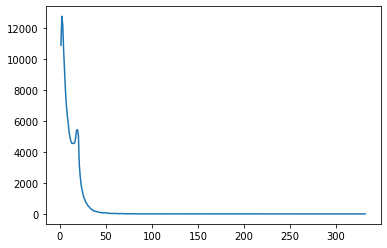

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_deg_dist(G):
    all_degrees = [ v for _, v in nx.degree(G) ]
    unique_degrees = sorted(set(all_degrees))
    count_of_degrees = []

    for i in unique_degrees:
        x = all_degrees.count(i)
        count_of_degrees.append(x)

    plt.plot(unique_degrees, count_of_degrees)
    plt.show()

plot_deg_dist(G)

### Distribution of local clustering coefficient

In [54]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import networkx as nx

#gc = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(G0)

#This is to draw the network- Please do not uncomment as it takes time becasue the graph is huge
cmap = plt.get_cmap('autumn') 
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in gc.nodes]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
#nx.draw_spring(gc, node_color=node_colors, with_labels=True, ax=ax1) #The line that we would uncomment in a perfect world
#fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)


#This is to plot the histogram 
ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#SORRY FOR THE EMPTY GRAPH- WILL REMOVE LATER BUT IT TOOK TIME TO RUN SO I DO NOT WANT TO RERUN- JUST LOOK AT THE RIGHT ONE

KeyboardInterrupt: ignored

In [55]:
def preferential_attachement(graph, edges=G.edges()):
    PA = {}
    
    for edge in edges:
        PA[edge] = graph.degree(edge[0]) * graph.degree(edge[1])
        
    return PA
    
pa = preferential_attachement(G0)

TypeError: ignored

In [56]:
def Jaccard(graph, edges=G.edges()):
    Jaccard = {}
    # Compute Jaccard metric for each non_edge of the graph
    
    for edge in edges: 
        inter_size = len(list(nx.common_neighbors(graph, edge[0], edge[1])))
        union_size = len(set(graph[edge[0]]) | set(graph[edge[1]]))
        Jaccard[edge] = inter_size / union_size
    
    return Jaccard

Jaccard(G0)

NetworkXError: ignored

In [57]:
def AdamicAdar(graph, edges=G.edges()):
    AdamicAdar = {}
    
    for edge in edges: 
        inter_list = nx.common_neighbors(graph, edge[0], edge[1])
        AdamicAdar[edge] = sum( [1/np.log(graph.degree(node)) for node in inter_list] )
    
    return AdamicAdar
AdamicAdar(G0)

NetworkXError: ignored